# Import

In [8]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import datetime as dt
import mplfinance as mpf

In [39]:
def save_to_csv_from_yahoo(ticker,syear,smonth,sday,eyear,emonth,eday):
    
    start = dt.datetime(syear,smonth,sday)
    end = dt.datetime(eyear,emonth,eday)
    
    df = web.DataReader(ticker,'yahoo',start,end)
    
    df.to_csv(ticker +'.csv' )
    
    return df

In [40]:
save_to_csv_from_yahoo('AMZN', 2020, 1, 1, 2022, 1, 1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966
2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
...,...,...,...,...,...,...
2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893
2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971
2021-12-29,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020


# Function that returns dataframe from CSV

In [44]:
def get_df_from_csv(ticker):
    try:
        df = pd.read_csv(ticker + '.csv')
    except FileNotFoundError:
        print ("File Doesn't Exist")
    else :
        return df

In [47]:
AMZN = get_df_from_csv('AMZN')
AMZN


,Date,High,Low,Open,Close,Volume,Adj Close
0,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966
1,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010
2,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971
3,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005
4,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985
...,...,...,...,...,...,...,...
501,2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893
502,2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971
503,2021-12-29,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020
504,2021-12-30,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893


# Add Daily Return to dataframe

In [49]:
def add_daily_return_to_df(df,ticker):
    
    df["daily_return"] = (df["Adj Close"] / df["Adj Close"].shift(1))-1
    
    df.to_csv(ticker + '.csv')
    
    return df

In [50]:
add_daily_return_to_df(AMZN,'AMZN')

,Date,High,Low,Open,Close,Volume,Adj Close,daily_return
0,2019-12-31,1853.260010,1832.229980,1842.000000,1847.839966,2506500,1847.839966,NaN
1,2020-01-02,1898.010010,1864.150024,1875.000000,1898.010010,4029000,1898.010010,0.027151
2,2020-01-03,1886.199951,1864.500000,1864.500000,1874.969971,3764400,1874.969971,-0.012139
3,2020-01-06,1903.689941,1860.000000,1860.000000,1902.880005,4061800,1902.880005,0.014886
4,2020-01-07,1913.890015,1892.040039,1904.500000,1906.859985,4044900,1906.859985,0.002092
...,...,...,...,...,...,...,...,...
501,2021-12-27,3458.860107,3384.310059,3420.739990,3393.389893,2934400,3393.389893,-0.008178
502,2021-12-28,3443.520020,3382.709961,3403.649902,3413.219971,2731900,3413.219971,0.005844
503,2021-12-29,3424.239990,3372.010010,3416.800049,3384.020020,1787700,3384.020020,-0.008555
504,2021-12-30,3417.760010,3370.479980,3394.000000,3372.889893,1879200,3372.889893,-0.003289


In [51]:
save_to_csv_from_yahoo('QQQ', 2020, 1, 1, 2022, 1, 1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-31,212.759995,211.199997,211.529999,212.610001,18170900.0,210.392807
2020-01-02,216.160004,213.979996,214.399994,216.160004,30969400.0,213.905777
2020-01-03,215.470001,213.279999,213.300003,214.179993,27518900.0,211.946396
2020-01-06,215.589996,212.240005,212.500000,215.559998,21655300.0,213.312027
2020-01-07,216.139999,214.850006,215.639999,215.529999,22139300.0,213.282349
...,...,...,...,...,...,...
2021-12-27,403.480011,398.220001,398.250000,403.480011,32820700.0,403.480011
2021-12-28,404.579987,400.709991,404.399994,401.609985,33113700.0,401.609985
2021-12-29,403.049988,399.109985,401.750000,401.549988,32248500.0,401.549988


In [53]:
import yfinance as yf

In [54]:
data = yf.download("ONGC.NS", start="2021-01-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [55]:
data


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,93.750000,94.449997,93.000000,93.199997,86.999077,15130377
2021-01-04,94.050003,97.300003,93.699997,96.949997,90.499573,39545073
2021-01-05,96.500000,96.500000,94.349998,94.949997,88.632637,26998014
2021-01-06,98.900002,99.300003,96.250000,96.949997,90.499573,50306161
2021-01-07,98.000000,99.050003,97.099998,97.900002,91.386368,25285200
2021-01-08,98.949997,101.300003,98.550003,100.650002,93.953400,36022114
2021-01-11,101.500000,102.900002,98.050003,102.550003,95.726990,36301647
2021-01-12,102.000000,104.500000,100.750000,103.449997,96.567108,28353142
2021-01-13,104.949997,107.900002,104.099998,105.250000,98.247345,42401579


In [57]:
dataa = yf.download("INFY.NS", start="2021-01-01", end="2021-03-01")

[*********************100%***********************]  1 of 1 completed


In [58]:
dataa


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,1257.900024,1265.500000,1255.800049,1260.449951,1236.039307,4253550
2021-01-04,1269.000000,1290.000000,1261.150024,1288.250000,1263.301025,7208454
2021-01-05,1282.000000,1299.000000,1275.050049,1293.800049,1268.743530,8145280
2021-01-06,1300.000000,1302.000000,1268.050049,1282.099976,1257.270142,7161715
2021-01-07,1296.000000,1297.650024,1255.500000,1262.150024,1237.706543,10954918
2021-01-08,1278.250000,1316.800049,1278.250000,1312.099976,1286.689087,13186251
2021-01-11,1342.099976,1383.349976,1340.000000,1376.199951,1349.547729,20528626
2021-01-12,1378.000000,1378.000000,1360.000000,1371.750000,1345.183960,8309868
2021-01-13,1373.849976,1392.800049,1360.000000,1387.150024,1360.285767,14442997


# Returns total return over time

In [65]:
def get_return_defined_time(df, syear, smonth, sday, eyear, emonth, eday):
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    df['Date'] = pd.to_datetime(df['Date'])
    
    mask = (df['Date']>= start) & (df['Date']<=end)
    
    daily_ret = df.loc[mask]["daily_return"].mean()
    
    df2 = df.loc[mask]
    days = df2.shape[0]
    
    return (days * daily_ret)
    
    
    

In [67]:
total_ret = get_return_defined_time(AMZN, 2020, 1, 1, 2022, 1, 1)
total_ret

0.6938513589821674

# MatPlotLib Finance

In [70]:
def mplfinance_plot(ticker,chart_type, syear, smonth, sday, eyear, emonth, eday):
    
    start = f"{syear}-{smonth}-{sday}"
    end = f"{eyear}-{emonth}-{eday}"
    
    try:
        df = pd.read_csv(ticker + '.csv')
    except FileNotFoundError:
        print ("File Doesn't Exist")
    else :
        df.index = pd.DatetimeIndex(df['Date'])
        df_sub = df.loc[start:end]
        mpf.plot(df_sub,type ='candle')
        mpf.plot(df_sub,type = 'line')
        mpf.plot(df_sub,type = 'ohlc',mav = 4)
        
        s = mpf.make_mpf_style(base_mpf_style='charles', rc={'font.size': 8})
        fig = mpf.figure(figsize=(12,8),style = s )
        
        ax = fig.add_subplot(2,1,2)
        av = fig.add_subplot(2,1,2, sharex = ax)
        
        mpf.plot(df_sub,type = chart_type, mav=(3,5,7), ax=ax, volume=av, show_nontrading=True)

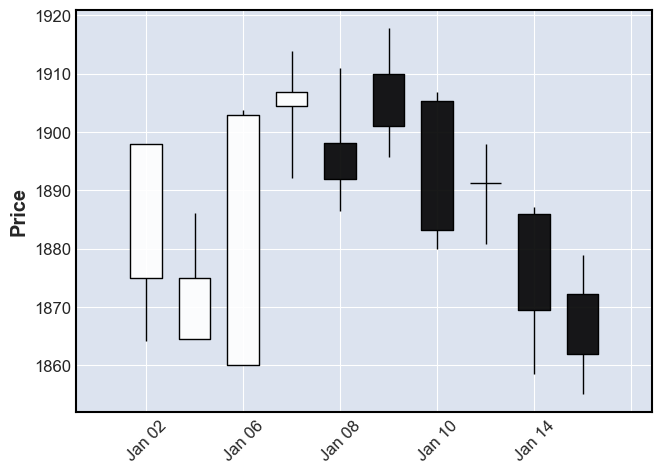

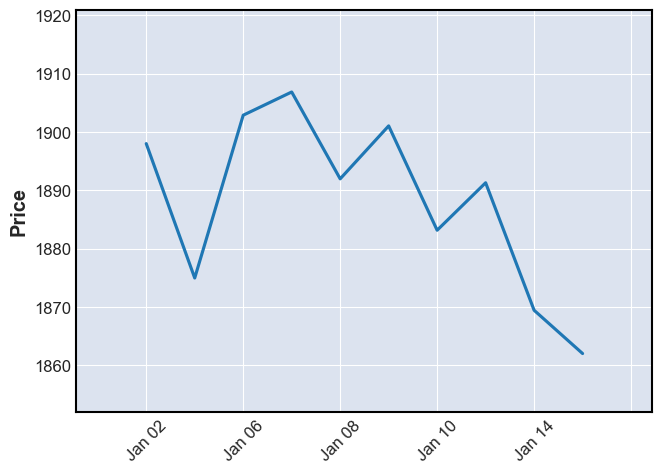

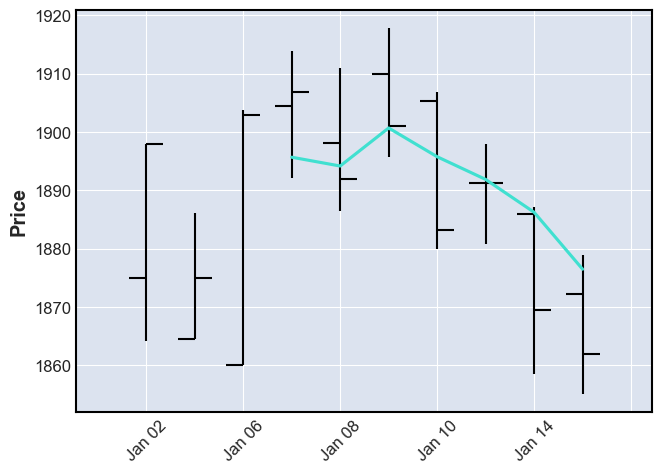

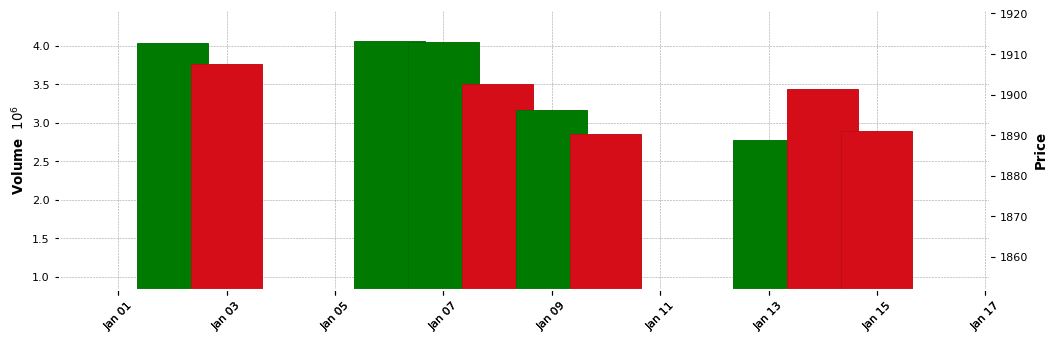

In [72]:
 mplfinance_plot('AMZN','ohlc', 2020, 1, 1, 2020, 1, 15)